In [ ]:
import pandas as pd
from gensim.models import KeyedVectors
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import wordnet as wn, wordnet_ic as wn_ic, lin_thesaurus as lin
import operator
import nltk

nltk.download()

brown_ic = wn_ic.ic("ic-brown.dat")
# filename = "../../GoogleNews-vectors-negative300.bin"
filename = "//ad.susx.ac.uk/ITS/Teaching/Departments/Informatics/AdvancedNLP/GoogleNews-vectors-negative300.bin"

# mymodel = KeyedVectors.load_word2vec_format(
#     filename, binary=True, limit=600000)
mymodel = KeyedVectors.load_word2vec_format(
    filename, binary=True)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [ ]:
def get_path_sim(word1, word2, wn_wordtype, sim_measure="path", ic_data=None):
    if sim_measure != "path" and ic_data == None:
        print('ERROR - IC DATA NEEDED')
        return 0
    word1_synsets = wn.synsets(word1, wn_wordtype)
    word2_synsets = wn.synsets(word2, wn_wordtype)

    results = []
    for word1_sense in word1_synsets:
        for word2_sense in word2_synsets:
            if sim_measure == "path":
                results.append((word1_sense, word2_sense,
                                word1_sense.path_similarity(word2_sense)))
            elif sim_measure == "res":
                results.append((word1_sense, word2_sense,
                                word1_sense.res_similarity(word2_sense, ic_data)))
            elif sim_measure == "lin":
                results.append((word1_sense, word2_sense,
                                word1_sense.lin_similarity(word2_sense, ic_data)))
            else:
                print(f"ERROR - uknown similarity measure: {sim_measure}")
    max_tuple = max(results, key=lambda x: x[2])

    return max_tuple[2]

In [ ]:
mymodel.similarity("man", "woman")
mymodel.most_similar(positive=['man'])
mymodel['man']

array([ 0.32617188,  0.13085938,  0.03466797, -0.08300781,  0.08984375,
       -0.04125977, -0.19824219,  0.00689697,  0.14355469,  0.0019455 ,
        0.02880859, -0.25      , -0.08398438, -0.15136719, -0.10205078,
        0.04077148, -0.09765625,  0.05932617,  0.02978516, -0.10058594,
       -0.13085938,  0.001297  ,  0.02612305, -0.27148438,  0.06396484,
       -0.19140625, -0.078125  ,  0.25976562,  0.375     , -0.04541016,
        0.16210938,  0.13671875, -0.06396484, -0.02062988, -0.09667969,
        0.25390625,  0.24804688, -0.12695312,  0.07177734,  0.3203125 ,
        0.03149414, -0.03857422,  0.21191406, -0.00811768,  0.22265625,
       -0.13476562, -0.07617188,  0.01049805, -0.05175781,  0.03808594,
       -0.13378906,  0.125     ,  0.0559082 , -0.18261719,  0.08154297,
       -0.08447266, -0.07763672, -0.04345703,  0.08105469, -0.01092529,
        0.17480469,  0.30664062, -0.04321289, -0.01416016,  0.09082031,
       -0.00927734, -0.03442383, -0.11523438,  0.12451172, -0.02

In [ ]:
df = pd.read_csv("./mcdata.csv", header=None)
df.columns = ["word1", "word2", "human_score"]

In [ ]:
word_pairs = list(zip(df["word1"], df["word2"]))

w2v_scores = [mymodel.similarity(word1, word2) for word1, word2 in word_pairs]
path_scores = [get_path_sim(word1, word2, wn.NOUN)
               for word1, word2 in word_pairs]
res_scores = [get_path_sim(word1, word2, wn.NOUN, "res", brown_ic)
              for word1, word2 in word_pairs]
lin_scores = [get_path_sim(word1, word2, wn.NOUN, "lin", brown_ic)
              for word1, word2 in word_pairs]

df["w2v_score"] = w2v_scores
df["path_score"] = path_scores
df["res_score"] = res_scores
df["lin_score"] = lin_scores

df

,word1,word2,human_score,w2v_score,path_score,res_score,lin_score
0,asylum,madhouse,3.61,0.252539,0.500000,9.475167,0.855584
1,bird,cock,3.05,0.362902,0.500000,7.677755,0.773937
2,bird,crane,2.97,0.302862,0.250000,7.677755,0.747812
3,boy,lad,3.76,0.588616,0.500000,8.399492,0.830562
4,brother,monk,2.82,0.223200,0.500000,9.261593,0.986407
5,car,automobile,3.92,0.583837,1.000000,7.591401,1.000000
6,cemetery,woodland,0.95,0.381925,0.111111,1.290026,0.123441
7,chord,smile,0.13,0.148692,0.090909,2.619644,0.246256
8,coast,forest,0.42,0.236098,0.166667,1.290026,0.130646
9,coast,hill,0.87,0.161158,0.200000,5.884681,0.599113


             human_score  path_score  res_score  lin_score  w2v_score
human_score     1.000000    0.722743   0.735945   0.753510   0.786557
path_score      0.722743    1.000000   0.900648   0.945509   0.582529
res_score       0.735945    0.900648   1.000000   0.962707   0.573820
lin_score       0.753510    0.945509   0.962707   1.000000   0.586323
w2v_score       0.786557    0.582529   0.573820   0.586323   1.000000


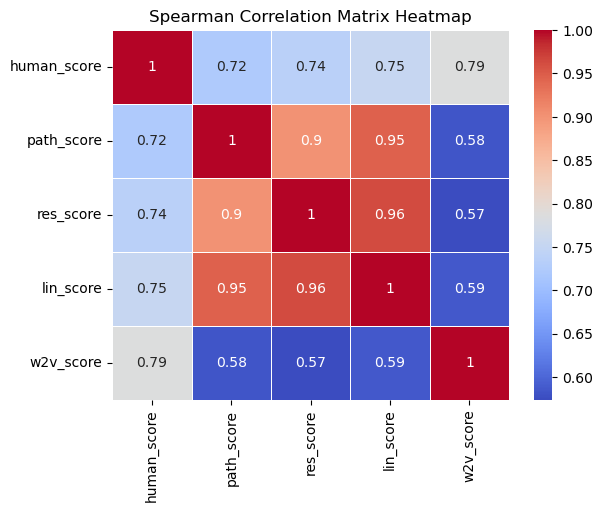

In [ ]:
# Compute Spearman correlation matrix using pandas
corr_matrix = df[['human_score', 'path_score',
                  'res_score', 'lin_score', 'w2v_score']].corr(method='spearman')

print(corr_matrix)
# Assuming 'corr_matrix' is the Spearman correlation matrix you computed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Spearman Correlation Matrix Heatmap')
plt.show()

In [ ]:
measures = []
scores = []

for item in corr_matrix.index:
    measures.append(item)
    scores.append(corr_matrix[item][0])

correlations = list(zip(measures, scores))[1:]
print(correlations)

[('path_score', 0.7227433991636343), ('res_score', 0.7359452588385684), ('lin_score', 0.7535104398162414), ('w2v_score', 0.7865569441632586)]


In [ ]:
# getting p value with spearman
# Compute Spearman correlation and p-values
import numpy as np
from scipy.stats import spearmanr

# Calculate Spearman correlation and p-values
results = {}
for col in ['w2v_score', 'path_score', 'res_score', 'lin_score']:
    corr, p_value = spearmanr(df['human_score'], df[col])
    results[col] = {'correlation': corr, 'p_value': p_value}

print(results)

# Output the results
for score_type, result in results.items():
    print(f"{score_type}: Correlation = {result['correlation']:.4f}, P-value = {result['p_value']:.6f}")

{'w2v_score': {'correlation': 0.7865569441632586, 'p_value': 2.5609804474191057e-07}, 'path_score': {'correlation': 0.7227433991636342, 'p_value': 6.464377552553087e-06}, 'res_score': {'correlation': 0.7359452588385684, 'p_value': 3.5753842119271696e-06}, 'lin_score': {'correlation': 0.7535104398162412, 'p_value': 1.537645680941842e-06}}
w2v_score: Correlation = 0.7866, P-value = 0.000000
path_score: Correlation = 0.7227, P-value = 0.000006
res_score: Correlation = 0.7359, P-value = 0.000004
lin_score: Correlation = 0.7535, P-value = 0.000002


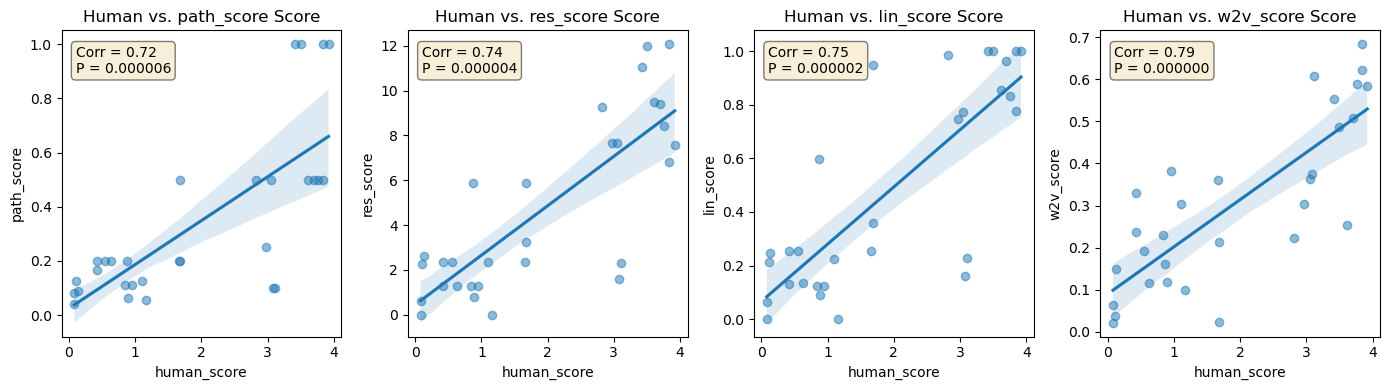

In [ ]:

fig, axs = plt.subplots(1, 4, figsize=(14, 4))

sim_measures = ["path_score", "res_score", "lin_score", "w2v_score"]
for ax, sim_meas in zip(axs.flat, sim_measures):

    sns.regplot(x='human_score', y=sim_meas, data=df,
                fit_reg=True, scatter_kws={'alpha': 0.5}, ax=ax)
    ax.set_title(f'Human vs. {sim_meas} Score')

    # Adding a text box
    spear = [meas for meas in correlations if meas[0] == sim_meas][0][1]
    textstr = f'Corr = {spear:.2f}\nP = {results[sim_meas]["p_value"]:.6f}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# Extension


# Extension: Significance Testing

How much better does one measure need to be than another in order for it to be a significant difference?

If a different set of pairs of words had been chosen, how likely is it that you would have come to a
different conclusion? This is a very hard question to answer conclusively but most notions of statistical
significance are based on the size of the sample (bigger sample more likely to be significant) and the
amount of variance in the sample (less variance implies more likely to be significant).
Here we are going

to attempt to estimate the significance of your results from Section 3

1. For each of the similarity measures you have considered, plot a scatter graph of word net-based
   similarity scores against human semantic judgments. You could use the scatter function from
   matplotlib or pandas for this. Make sure you add labels to the x and y axes and a title.


2. Add a text box to the graph to display the correlation coefficient and the p-value. What does this
   p-value mean?

"A p-value close to 1 suggests no correlation other than due to chance. If your p-value is close to 0, the observed correlation is unlikely to be due to chance"


3. Calculate the regression line (i.e., the line of best fit) for each data set and display it on the graph.
   You can use scipy.stats.linregress() to calculate the regression line. Does this function return
   the same correlation coefficient as scipy.stats.spearmanr()?

NO
Pearson and Spearman correlation coefficients are two widely used statistical measures when measuring the relationship between variables. The Pearson correlation coefficient assesses the linear relationship between variables, while the Spearman correlation coefficient evaluates the monotonic relationship. In this article, we will delve into a comprehensive comparison of these correlation coefficients.


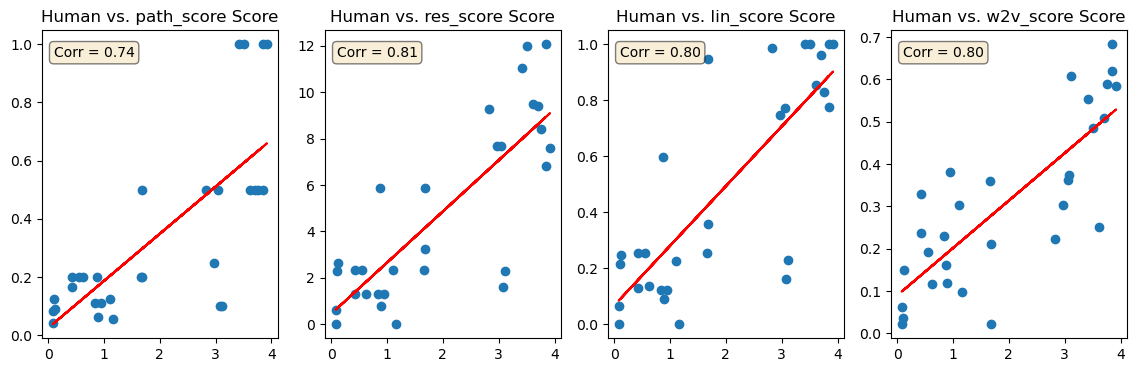

In [ ]:
from scipy.stats import linregress


fig, axs = plt.subplots(1, 4, figsize=(14, 4))

sim_measures = ["path_score", "res_score", "lin_score", "w2v_score"]
for ax, sim_meas in zip(axs.flat, sim_measures):

    x = df["human_score"]
    y = df[sim_meas]
    res = linregress(df["human_score"], df[sim_meas])

    ax.plot(x, y, 'o', label='original data')
    ax.plot(x, res.intercept + res.slope*x, 'r', label='regression line')
    # ax.legend()
    ax.set_title(f'Human vs. {sim_meas} Score')
    textstr = f'Corr = {res.rvalue:.2f}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)

plt.show()

4. One way to get a handle on whether the differences between two correlation coefficients are significant
   is to construct 95% confidence intervals for those coefficients. A p% confidence interval should
   capture the true value p% of the time. Therefore if the confidence intervals don’t overlap, there is
   a very small chance (< 0.0252) that the one which has been observed to be the best is not the best.
   Common ways to construct confidence intervals include the Central Limit Theorem, cross-validation
   and bootstrapping. Here we will use bootstrapping2
   .
   In order to construct a 95% confidence interval of the correlation coefficient for n points.

(a) Take a random sample of n points (with replacement!).

(b) Calculate the correlation coefficient for the random sample.

(c) Repeat at least 100 times (1000 or 10000 would be better).

(d) Find the 2.5% and 97.5% percentiles from the list of correlation coefficients found for the different random samples. This is your 95% confidence interval.

Construct 95% confidence intervals for at least 2 of the correlation coefficients. What do you conclude about the differences?


In [ ]:
n = 15


coef_results = {'w2v_score':[],'path_score':[], 'res_score':[], 'lin_score':[]}

for _ in range(10000):
    sample_df = df.sample(n=n, replace=True)

    for col in ['w2v_score', 'path_score', 'res_score', 'lin_score']:
        corr, p_value = spearmanr(sample_df['human_score'], sample_df[col])
        coef_results[col].append(corr)

conf_int_df = pd.DataFrame(coef_results)

In [ ]:
print(conf_int_df["path_score"].head())

sim_measures = ["path_score", "res_score", "lin_score", "w2v_score"]

for meas in sim_measures:
    print("--------------")
    print(f"conf intervals - {meas.upper()}")
    print("2.5%", conf_int_df[meas].quantile(0.025))
    print("97.5%", conf_int_df[meas].quantile(0.975))
    print("--------------")

0    0.685925
1    0.800268
2    0.745292
3    0.687754
4    0.686895
Name: path_score, dtype: float64
--------------
conf intervals - PATH_SCORE
2.5% 0.2823562487821306
97.5% 0.9232302166405838
--------------
--------------
conf intervals - RES_SCORE
2.5% 0.37111334661855944
97.5% 0.9058522149451621
--------------
--------------
conf intervals - LIN_SCORE
2.5% 0.3956820146480141
97.5% 0.91575721552045
--------------
--------------
conf intervals - W2V_SCORE
2.5% 0.40325464340698114
97.5% 0.9459459459459458
--------------


In [ ]:
from scipy.stats import pearsonr

n = 15


coef_results = {'w2v_score':[],'path_score':[], 'res_score':[], 'lin_score':[]}

for _ in range(10000):
    sample_df = df.sample(n=n, replace=True)

    for col in ['w2v_score', 'path_score', 'res_score', 'lin_score']:
        corr, p_value = pearsonr(sample_df['human_score'], sample_df[col])
        coef_results[col].append(corr)

conf_int_df = pd.DataFrame(coef_results)

# print(conf_int_df["path_score"].head())

sim_measures = ["path_score", "res_score", "lin_score", "w2v_score"]

for meas in sim_measures:
    print("--------------")
    print(f"conf intervals - {meas.upper()}")
    print("2.5%", conf_int_df[meas].quantile(0.025))
    print("97.5%", conf_int_df[meas].quantile(0.975))
    print("--------------")

--------------
conf intervals - PATH_SCORE
2.5% 0.513247514717445
97.5% 0.9165684369283839
--------------
--------------
conf intervals - RES_SCORE
2.5% 0.5734675268638212
97.5% 0.9484504494767481
--------------
--------------
conf intervals - LIN_SCORE
2.5% 0.5324148318318839
97.5% 0.9616657641370504
--------------
--------------
conf intervals - W2V_SCORE
2.5% 0.5586413145125251
97.5% 0.9421823229205626
--------------


Construct 95% confidence intervals for at least 2 of the correlation coefficients. What do you conclude about the differences?

6 More Discussion Points

• What correlation coefficient did you use? Does it matter?

• For which pairs of words was there most agreement and for which pairs most disagreement?

• What are the problems with using this kind of evaluation of semantic similarity measures?

• To use the resnik and lin similarity measures, it is necessary to specify a corpus (e.g., ’ic-brown.dat’).
Why?
How might this affect the results?
What do you need to do to a corpus before you can plug it into a WordNet similarity measure?
How might this affect the results?


## Interpreting Correlation Data

"The Spearman's Rank Correlation Coefficient is used to discover the strength of a link between two sets of data."

Interpreting correlation data, especially from Spearman's rank correlation coefficient, involves understanding the strength and direction of the relationship between two variables. The correlation coefficient (often denoted as \(r_s\)) ranges from -1 to +1, where:

- **+1** indicates a perfect positive correlation: as one variable increases, the other variable also increases.
- **-1** indicates a perfect negative correlation: as one variable increases, the other variable decreases.
- **0** indicates no correlation: there is no linear relationship between the variables.

### Positive Values

Positive values close to +1 suggest that as one score increases, the other score tends to also increase. This indicates a strong agreement between the variables. For instance, if the `human_score` and `lin_score` have a correlation close to +1, it means that as the human judgment of similarity increases, the Lin similarity score also tends to be higher, suggesting that the Lin similarity measure aligns well with human judgment.

### Negative Values

Negative values close to -1 suggest an inverse relationship. However, in the context of similarity scores, negative values are less common and typically indicate an error or a non-standard type of analysis.

### Values Around 0

Values around 0 suggest that there is no linear relationship between the two variables. However, it's important to note that Spearman's correlation assesses monotonic relationships, so a zero or near-zero value indicates a lack of even a monotonic relationship.


When comparing the correlation coefficients obtained from `scipy.stats.linregress` with those obtained through Spearman and Pearson correlation analyses, it's essential to understand the contexts in which each method is used, their underlying assumptions, and what they measure.

### Pearson Correlation Coefficient

- **What it measures:** Pearson's correlation coefficient measures the linear relationship between two continuous variables.
- **Assumptions:** It assumes that both variables are normally distributed, the relationship between the variables is linear, and the data is homoscedastic (i.e., the variance of the data is the same across the range of values).
- **Use case:** Best used when the relationship between variables is linear and the data meets the normality assumption.
- **Range:** The value ranges from -1 to 1, where -1 indicates a perfect negative linear relationship, 1 indicates a perfect positive linear relationship, and 0 indicates no linear relationship.

### Spearman Correlation Coefficient

- **What it measures:** Spearman's correlation coefficient measures the monotonic relationship between two variables, based on the ranked values rather than the raw data.
- **Assumptions:** It does not assume a linear relationship or that the data are normally distributed, making it a non-parametric measure.
- **Use case:** Useful when the relationship between variables is not linear or when the data does not meet the assumptions of normality required by Pearson's correlation. It is also appropriate for ordinal data.
- **Range:** Like Pearson, its values range from -1 to 1 with similar interpretations but based on ranks.

### Linear Regression (from `scipy.stats.linregress`)

- **What it measures:** The `linregress` function from `scipy.stats` performs a linear regression between two variables, providing the slope, intercept, r-value (correlation coefficient), p-value for a hypothesis test on the slope, and standard error of the estimate.
- **Correlation Coefficient:** The r-value provided by `linregress` is a measure of the strength and direction of the linear relationship between the variables.
- **Assumptions:** Similar to Pearson, it assumes a linear relationship between the variables and homoscedasticity.
- **Use case:** It's used when you're interested in understanding the linear relationship between two variables, including the slope of the best-fit line through the data.

### Differences and Similarities

- **Differences:**
  - **Assumptions:** Pearson and linear regression assume linear relationships and normally distributed data, whereas Spearman does not.
  - **Data Type:** Spearman can be used with ordinal data, whereas Pearson and linear regression are typically used with interval or ratio scale data.
  - **What's Measured:** Linear regression provides more detailed information (slope, intercept) about the linear relationship than the correlation coefficients alone.
- **Similarities:**
  - **Measurement of Relationship:** Both Pearson and Spearman measure the strength and direction of a relationship, with their coefficients ranging from -1 to 1. The r-value from `linregress` serves a similar purpose for Pearson's correlation.
  - **Non-parametric vs. Parametric:** Spearman is non-parametric; Pearson and the correlation coefficient from linear regression are parametric.

### Conclusion

Choosing between these methods depends on your data's characteristics and the nature of the relationship you're investigating. For linear relationships with normally distributed data, Pearson's correlation or linear regression (with its correlation coefficient) is appropriate. For ordinal data or when the relationship is not linear, Spearman's correlation is more suitable.


Certainly! The concept of a monotonic relationship between two variables is an important aspect of understanding how Spearman's correlation coefficient works and when it is appropriate to use it.

### Monotonic Relationship

- **Definition:** A monotonic relationship is a relationship that does one of two things consistently: as one variable increases, the other either consistently increases as well or consistently decreases. It doesn't necessarily have to increase or decrease at a constant rate, but the direction of the relationship between the two variables remains constant.
- **Types:**
  - **Monotonically Increasing:** If the value of one variable increases, the value of the other variable also increases. This increase doesn't need to be at a constant rate.
  - **Monotonically Decreasing:** If the value of one variable increases, the value of the other variable decreases. Again, the rate of decrease can vary.

### Importance in Spearman's Correlation

- **Rank-based:** Spearman's correlation coefficient is based on the ranked values of the data rather than the raw data itself. This makes it ideal for identifying monotonic relationships because it only concerns the direction in which the ranks change, not the magnitude of change.
- **Non-linear Relationships:** Spearman's correlation can capture both linear and non-linear monotonic relationships. For example, if one variable tends to increase as the other increases, but not necessarily at a constant rate or linearly, Spearman's correlation would still identify a strong relationship.
- **Use Cases:** It is particularly useful when the relationship between variables is expected to be monotonic but not necessarily linear. This can often be the case in ordinal data or when dealing with variables that have a non-linear relationship.

### Comparison with Pearson's Correlation

- **Pearson's Correlation:** Focuses on linear relationships, requiring the increase or decrease between variables to be proportional. It directly uses the raw values of the data and assumes a constant rate of increase or decrease (i.e., a linear relationship).
- **Spearman's Correlation:** Does not require a linear relationship and can handle both linear and non-linear monotonic relationships by utilizing the ranks of values.

### Example

Imagine you're examining the relationship between age and a certain cognitive skill. The skill might improve with age during childhood and adolescence, plateau in early adulthood, and then gradually decline in older age. The relationship between age and cognitive skill over a lifespan is not linear, but it is monotonic (increasing and then decreasing). Spearman's correlation would be effective in capturing the strength and direction of this relationship because it considers the ranks (older ages are associated with different stages of cognitive skill) rather than the exact ages and skill levels.

### Conclusion

Understanding monotonic relationships is crucial when analyzing data because it helps determine the most appropriate statistical method to use. Spearman's correlation is a powerful tool for capturing these kinds of relationships, offering insights that might be missed by methods that focus solely on linear relationships.
